# Face Detection, Allignment, Embeddings, Clustering
The notebook consists of the following parts:
- 0. Correct jpg files metadata
- 1. MTCNN (detect faces on photos)
- 2. Filter results (remove bad quality photos)
- 3. FaceNet embeddings (obtain 128-dim vector/embedding representing faces features numerically with FaceNet)
- 4. t-SNE results (obtain 2-D representation of photos separating different photos further from each other)

In [87]:
# Load libraries and helper functions by running utils.py with a jupyter magic function:
%run utils.py

Libraries and functions loaded


## 0. Correct jpg files metadata (creation-time)
It is often that metadata for jpg files is wrong (e.g. the camera was not set correctly), here are some usefull functions to check and correct the metadata:

### Check the metadata for jpg files

In [88]:
# Check creation times in one of the subfolders:
subdirectory = r'Test_photoset\2019-2020_London'
get_creation_times_range(subdirectory)

years: 2019 - 2020 ; months: 2 - 11 ; days: 3 - 22


In [89]:
# Scan over immediate subfolders in the main directory folder and check creation times within these subfolders
directory = r'Test_photoset'
print_creation_times_for_subfolders(directory)

Number of immediate subfolders:  5

0
Test_photoset\.ipynb_checkpoints
0 jpg files in subdirectory

1
Test_photoset\2018_Europe
3 jpg files in subdirectory
years: 2018 - 2018 ; months: 10 - 11 ; days: 1 - 3

2
Test_photoset\2018_Moscow
4 jpg files in subdirectory
years: 2018 - 2018 ; months: 9 - 9 ; days: 8 - 17

3
Test_photoset\2019-2020_London
6 jpg files in subdirectory
years: 2019 - 2020 ; months: 2 - 11 ; days: 3 - 22

4
Test_photoset\2020.09_London
2 jpg files in subdirectory
years: 2020 - 2020 ; months: 8 - 8 ; days: 10 - 10



### Correct the metadata (if needed)

In [90]:
# Change single file creation datetime (if needed)
file_path = r'Test_photoset\2020.09_London\7.jpeg'
change_jpg_datetime(file_path, 2020, 9, 30)

In [91]:
# Change creation times of all jpg files in the folder
subdirectory = r'Test_photoset\2020.09_London'
change_datetime_in_folder(subdirectory, 2020, 8, 10)

# 1. MTCNN (Multi-Task CNN)
Multi Task CNN performs multiple tasks simultaneously: face detection and face allignment (finding landmarks on the face).
- Original paper: https://arxiv.org/abs/1604.02878  
- Github repo: https://github.com/ipazc/mtcnn by https://www.linkedin.com/in/ivandepazcenteno/:   
- Description with examples https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/  

In [92]:
%%time
#Scan a folder with subfolders containing photos and perfrom MTCNN on all photos, save results to a csv file
get_mtcnn_results(r'Test_photoset', r'MTCNN_testset_results.csv', min_face_size = 100)
#get_mtcnn_results(r'D:\Photo', r'output\MTCNN_min_face_200.csv', min_face_size = 200)

15 jpg files in directory
0 jpg files already scanned before


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:14<00:00,  1.01it/s]


Wall time: 16.1 s


## 2. Filter photos
MTCNN results regularly need a lot of filtering for at least these reasons:
- Not a face detected (low confidence of the model - this is not a face or occluded face...)
- Face size (too small face for further analysis). Although MTCNN takes min_face_size as an argument some of the found faces are still smaller than the min_face_size parameter
- Person looks to the side
- Face not in focus
- Grayscale image
- etc.

In [93]:
# Load the saved dataframe with the MTCNN results
df = load_MTCNN_scan_results(r'MTCNN_testset_results.csv')
#df = load_MTCNN_scan_results(r'output\MTCNN_min_face_200.csv')
pd.set_option("display.max_colwidth", 250) 
df.tail()

15 jpg files scanned with MTCNN
11 jpg files with detected faces
34 total faces detected on all photos


file_path creation_date  \
29  Test_photoset\2019-2020_London\2.jpeg    2020-02-22   
30   Test_photoset\2020.09_London\13.jpeg    2020-08-10   
31   Test_photoset\2020.09_London\13.jpeg    2020-08-10   
32    Test_photoset\2020.09_London\7.jpeg    2020-08-10   
33    Test_photoset\2020.09_London\7.jpeg    2020-08-10   

                                                                                                                                                                                                           MTCNN_result  
29  {'box': [2315, 1243, 729, 822], 'confidence': 0.936873197555542, 'keypoints': {'left_eye': (2436, 1596), 'right_eye': (2675, 1504), 'nose': (2502, 1744), 'mouth_left': (2513, 1904), 'mouth_right': (2736, 1837)}}  
30       {'box': [1334, 868, 114, 147], 'confidence': 0.9999281167984009, 'keypoints': {'left_eye': (1363, 933), 'right_eye': (1414, 928), 'nose': (1389, 959), 'mouth_left': (1371, 979), 'mouth_right': (1417, 974)}}  
31              {'box': [448, 769, 86, 113], 'confidence': 0.9954084753990173, 'keypoints': {'left_eye': (486, 813), 'right_eye': (522, 813), 'nose': (511, 838), 'mouth_left': (484, 852), 'mouth_right': (518, 850)}}  
32  {'box': [1222, 1025, 96, 124], 'confidence': 0.9876158833503723, 'keypoints': {'left_eye': (1260, 1060), 'right_eye': (1284, 1055), 'nose': (1263, 1089), 'mouth_left': (1267, 1118), 'mouth_right': (1284, 1112)}}  
33        {'box': [523, 960, 100, 142], 'confidence': 0.9800077676773071, 'keypoints': {'left_eye': (583, 1019), 'right_eye': (608, 1033), 'nose': (600, 1051), 'mouth_left': (559, 1067), 'mouth_right': (580, 1076)}}

0it [00:00, ?it/s]

0 image from total of 1 scanned images
Test_photoset\2018_Europe\0.jpeg
angle = 7 ; nose shift = 2 ; sharpness = 124


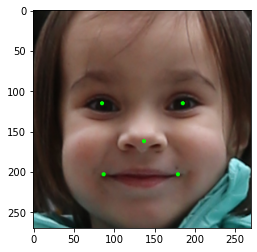

1it [00:00,  2.07it/s]

1 image from total of 2 scanned images
Test_photoset\2018_Europe\0.jpeg
angle = 1 ; nose shift = 6 ; sharpness = 137


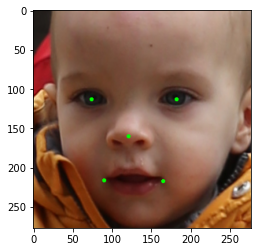

2it [00:00,  2.04it/s]

2 image from total of 6 scanned images
Test_photoset\2018_Europe\1.jpeg
angle = -2 ; nose shift = 14 ; sharpness = 73


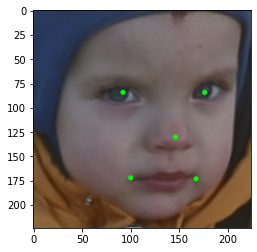

7it [00:01,  2.78it/s]

3 image from total of 8 scanned images
Test_photoset\2018_Europe\1.jpeg
angle = 2 ; nose shift = 1 ; sharpness = 69


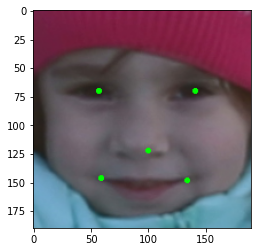

8it [00:02,  2.59it/s]

4 image from total of 9 scanned images
Test_photoset\2018_Europe\2.jpeg
angle = 3 ; nose shift = 4 ; sharpness = 106


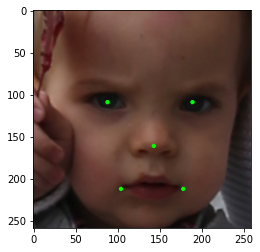

9it [00:02,  2.37it/s]

5 image from total of 10 scanned images
Test_photoset\2018_Europe\2.jpeg
angle = -22 ; nose shift = 10 ; sharpness = 115


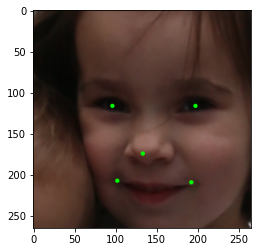

10it [00:03,  2.29it/s]

6 image from total of 17 scanned images
Test_photoset\2018_Moscow\1.jpeg
angle = -3 ; nose shift = 10 ; sharpness = 85


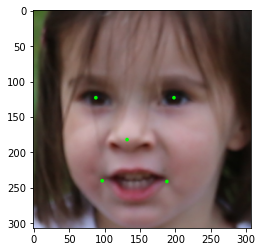

22it [00:04,  3.36it/s]

7 image from total of 23 scanned images
Test_photoset\2018_Moscow\3.jpeg
angle = 7 ; nose shift = 13 ; sharpness = 197


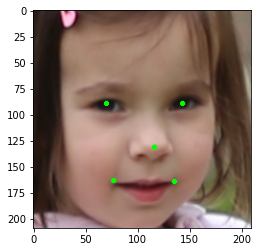

23it [00:05,  2.83it/s]

8 image from total of 24 scanned images
Test_photoset\2018_Moscow\3.jpeg
angle = -9 ; nose shift = 11 ; sharpness = 118


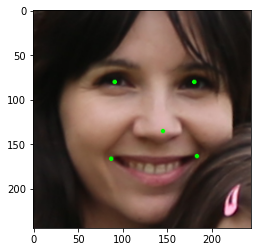

25it [00:05,  2.80it/s]

9 image from total of 27 scanned images
Test_photoset\2019-2020_London\0.jpeg
angle = -22 ; nose shift = 12 ; sharpness = 70


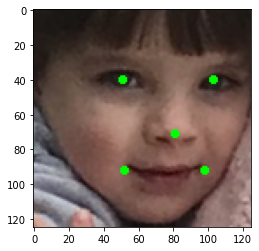

27it [00:06,  3.62it/s]

10 image from total of 31 scanned images
Test_photoset\2020.09_London\13.jpeg
angle = -5 ; nose shift = 2 ; sharpness = 57


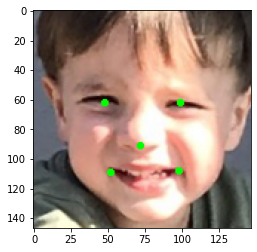

34it [00:06,  5.42it/s]

Number of faces before filtering: 34 Number of faces after filtering: 0
Wall time: 6.28 s


In [95]:
%%time

confidence_filter = 0.99
face_height_filter = 50
nose_shift_filter = 15
eye_line_angle_filter = 45
sharpness_filter = 50
save_image = False
preview = True

df_filtered = image_filter(df, save_image, preview, confidence_filter, face_height_filter, nose_shift_filter, eye_line_angle_filter, sharpness_filter)
print('Number of faces before filtering:', len(df), 'Number of faces after filtering:', len(df_filtered))
df_filtered.to_csv(r'MTCNN_testset_results_filtered.csv')
#df_filtered.to_csv(r'output\MTCNN_min_face_200_filtered.csv')

## 3. FaceNet Embeddings

In [18]:
df_filtered = pd.read_csv(r'output\MTCNN_min_face_200_filtered.csv')
df_filtered

Unnamed: 0                                          file_path  \
0            391  D:\Photo\2012.12.26-05 Джермания\I-phone\IMG_0...   
1            400  D:\Photo\2012.12.26-05 Джермания\I-phone\IMG_0...   
2            519  D:\Photo\2008.07.20 Приключения итальянцев в Р...   
3            639                D:\Photo\2008.10 Осень\S7300402.jpg   
4            640                D:\Photo\2008.10 Осень\S7300403.JPG   
...          ...                                                ...   
1748      103359  D:\Photo\2020.03 Фотосессия Даня и Лиза в лучш...   
1749      103382  D:\Photo\2020.03 Фотосессия Даня и Лиза в лучш...   
1750      103386  D:\Photo\2020.03 Фотосессия Даня и Лиза в лучш...   
1751      103388  D:\Photo\2020.03 Фотосессия Даня и Лиза в лучш...   
1752      103391  D:\Photo\2020.03 Фотосессия Даня и Лиза в лучш...   

     creation_date                                       MTCNN_result  \
0       2012-12-26  {'box': [1555, 1300, 329, 389], 'confidence': ...   
1       2012-12-26  {'box': [325, 1268, 442, 647], 'confidence': 0...   
2       2008-07-20  {'box': [1399, 768, 379, 455], 'confidence': 0...   
3       2008-10-15  {'box': [1095, 881, 307, 428], 'confidence': 0...   
4       2008-10-15  {'box': [1538, 565, 304, 403], 'confidence': 0...   
...            ...                                                ...   
1748    2020-03-10  {'box': [1825, 666, 649, 725], 'confidence': 0...   
1749    2020-03-10  {'box': [2383, 735, 602, 756], 'confidence': 0...   
1750    2020-03-10  {'box': [2364, 743, 606, 737], 'confidence': 0...   
1751    2020-03-10  {'box': [2254, 884, 519, 585], 'confidence': 0...   
1752    2020-03-10  {'box': [2202, 821, 511, 600], 'confidence': 0...   

      face_num                 face_file_path  
0            1     output/face_photos/391.jpg  
1            1     output/face_photos/400.jpg  
2            3     output/face_photos/519.jpg  
3            1     output/face_photos/639.jpg  
4            1     output/face_photos/640.jpg  
...        ...                            ...  
1748         1  output/face_photos/103359.jpg  
1749         1  output/face_photos/103382.jpg  
1750         1  output/face_photos/103386.jpg  
1751         1  output/face_photos/103388.jpg  
1752         1  output/face_photos/103391.jpg  

[1753 rows x 6 columns]

In [104]:
# load the pretrained facenet model
model = load_model(r'facenet_keras_pretrained/model/facenet_keras.h5')
#print(model.inputs)
#print(model.outputs)
#model.summary()

In [106]:
%%time
embeddings = []
for file_path in df['face_file_path']:
    emb = get_facenet_embedding(file_path, model)
    embeddings.append(emb)
embeddings = np.array(embeddings)
embeddings.shape

Wall time: 3min 46s


(1753, 128)

In [109]:
# Save embeddings to the file
np.save('output/embeddings', embeddings)

## t-SNE

In [17]:
X = np.load('output/embeddings.npy')
X.shape

(1753, 128)

In [19]:
creation_date=df_filtered['creation_date']
n_colors = len(set(creation_date))
n_colors

390

C:\Users\evgen\Anaconda3\envs\DL_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


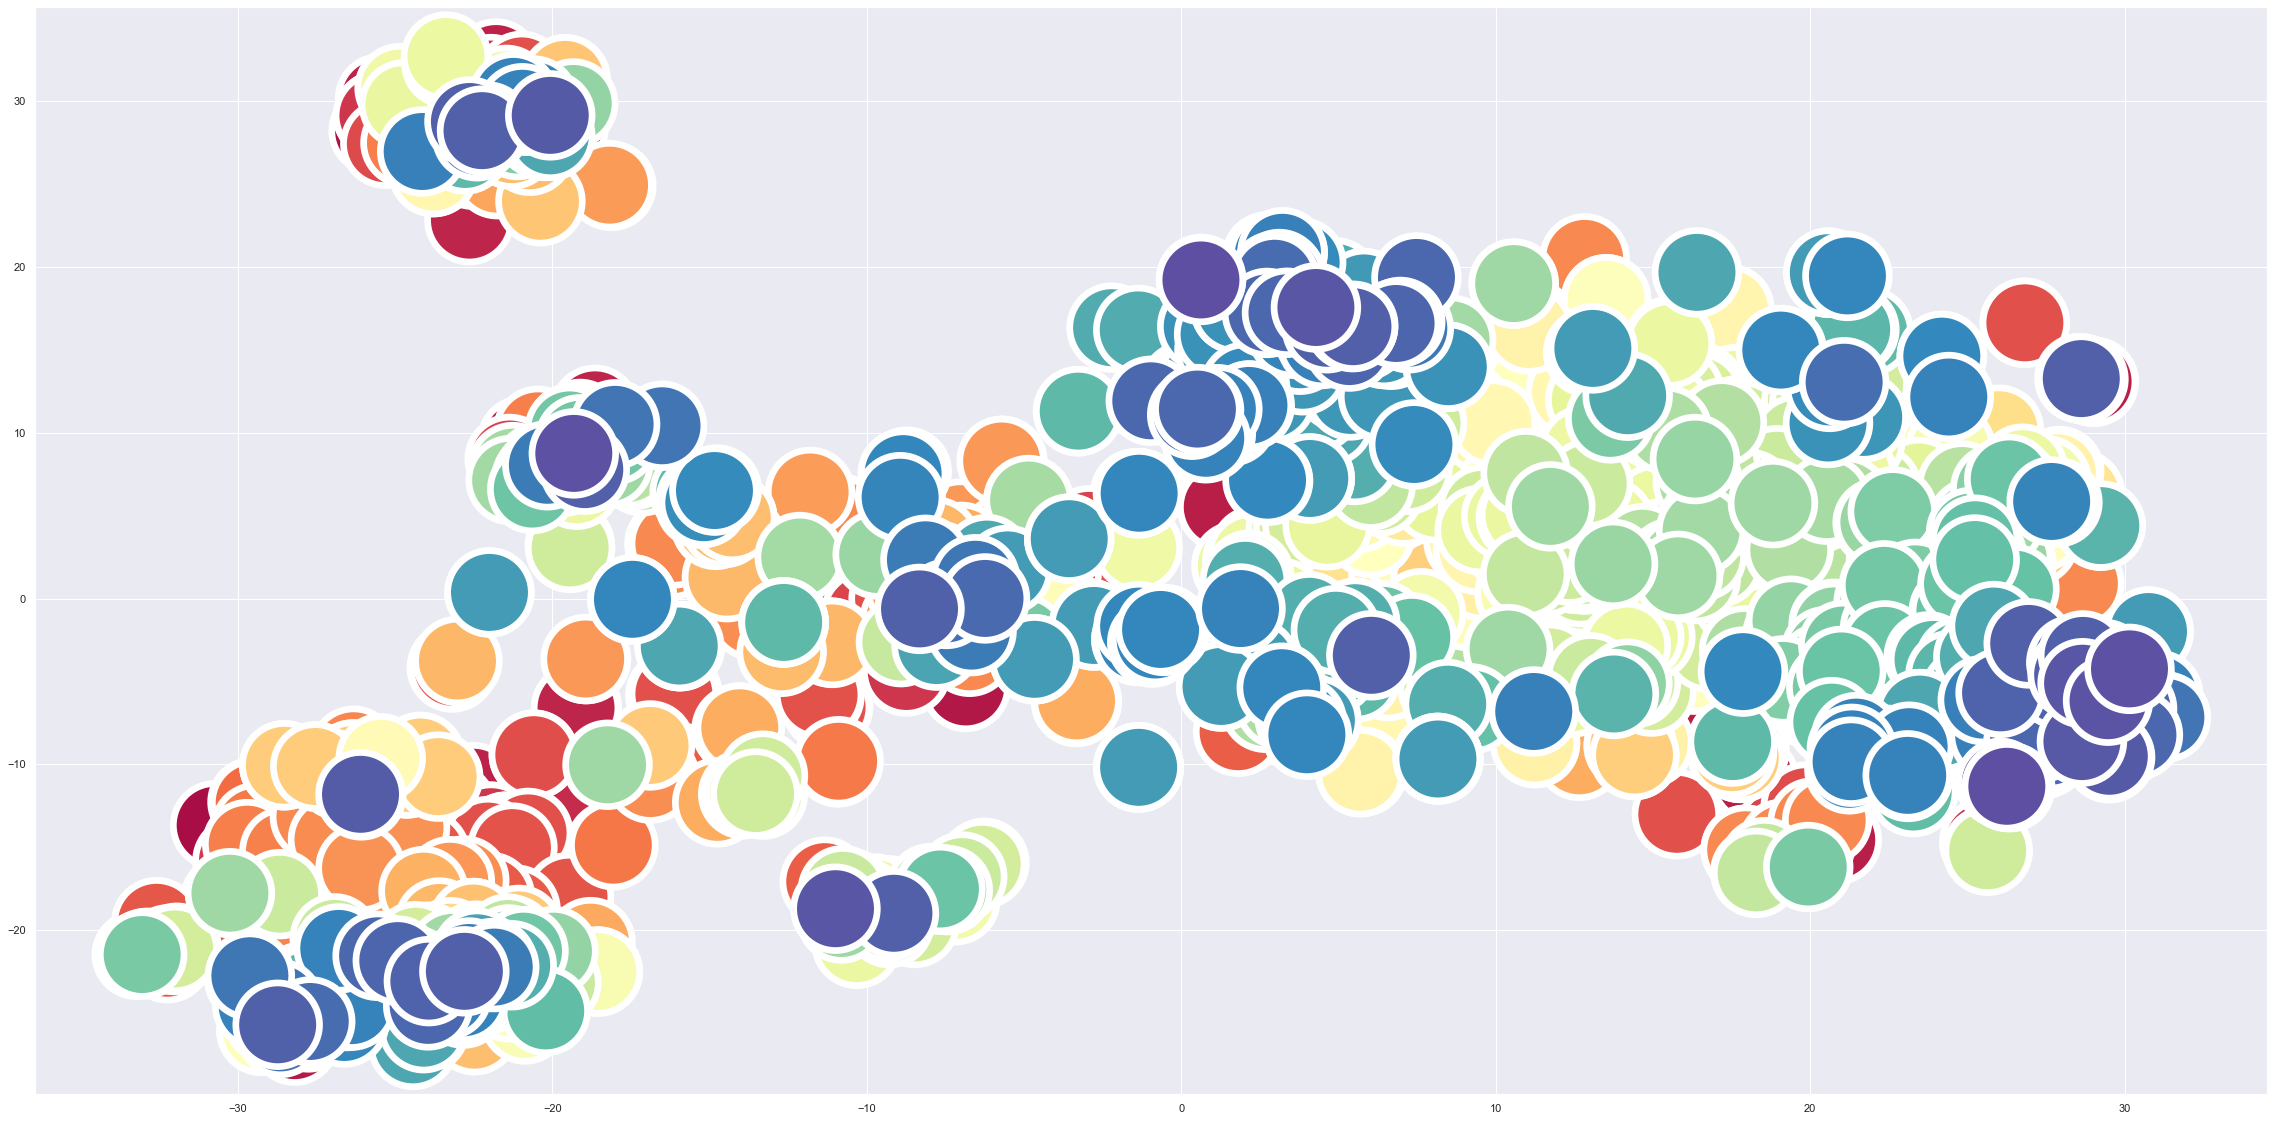

In [20]:
X_embedded = TSNE(perplexity=100, learning_rate = 1000, n_iter=1000, random_state=0).fit_transform(X)
sns.set(rc={'figure.figsize':(40,20)})

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = creation_date, s=7000, palette=sns.color_palette('Spectral',n_colors))
plt.legend([],[], frameon=False)

C:\Users\evgen\Anaconda3\envs\DL_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


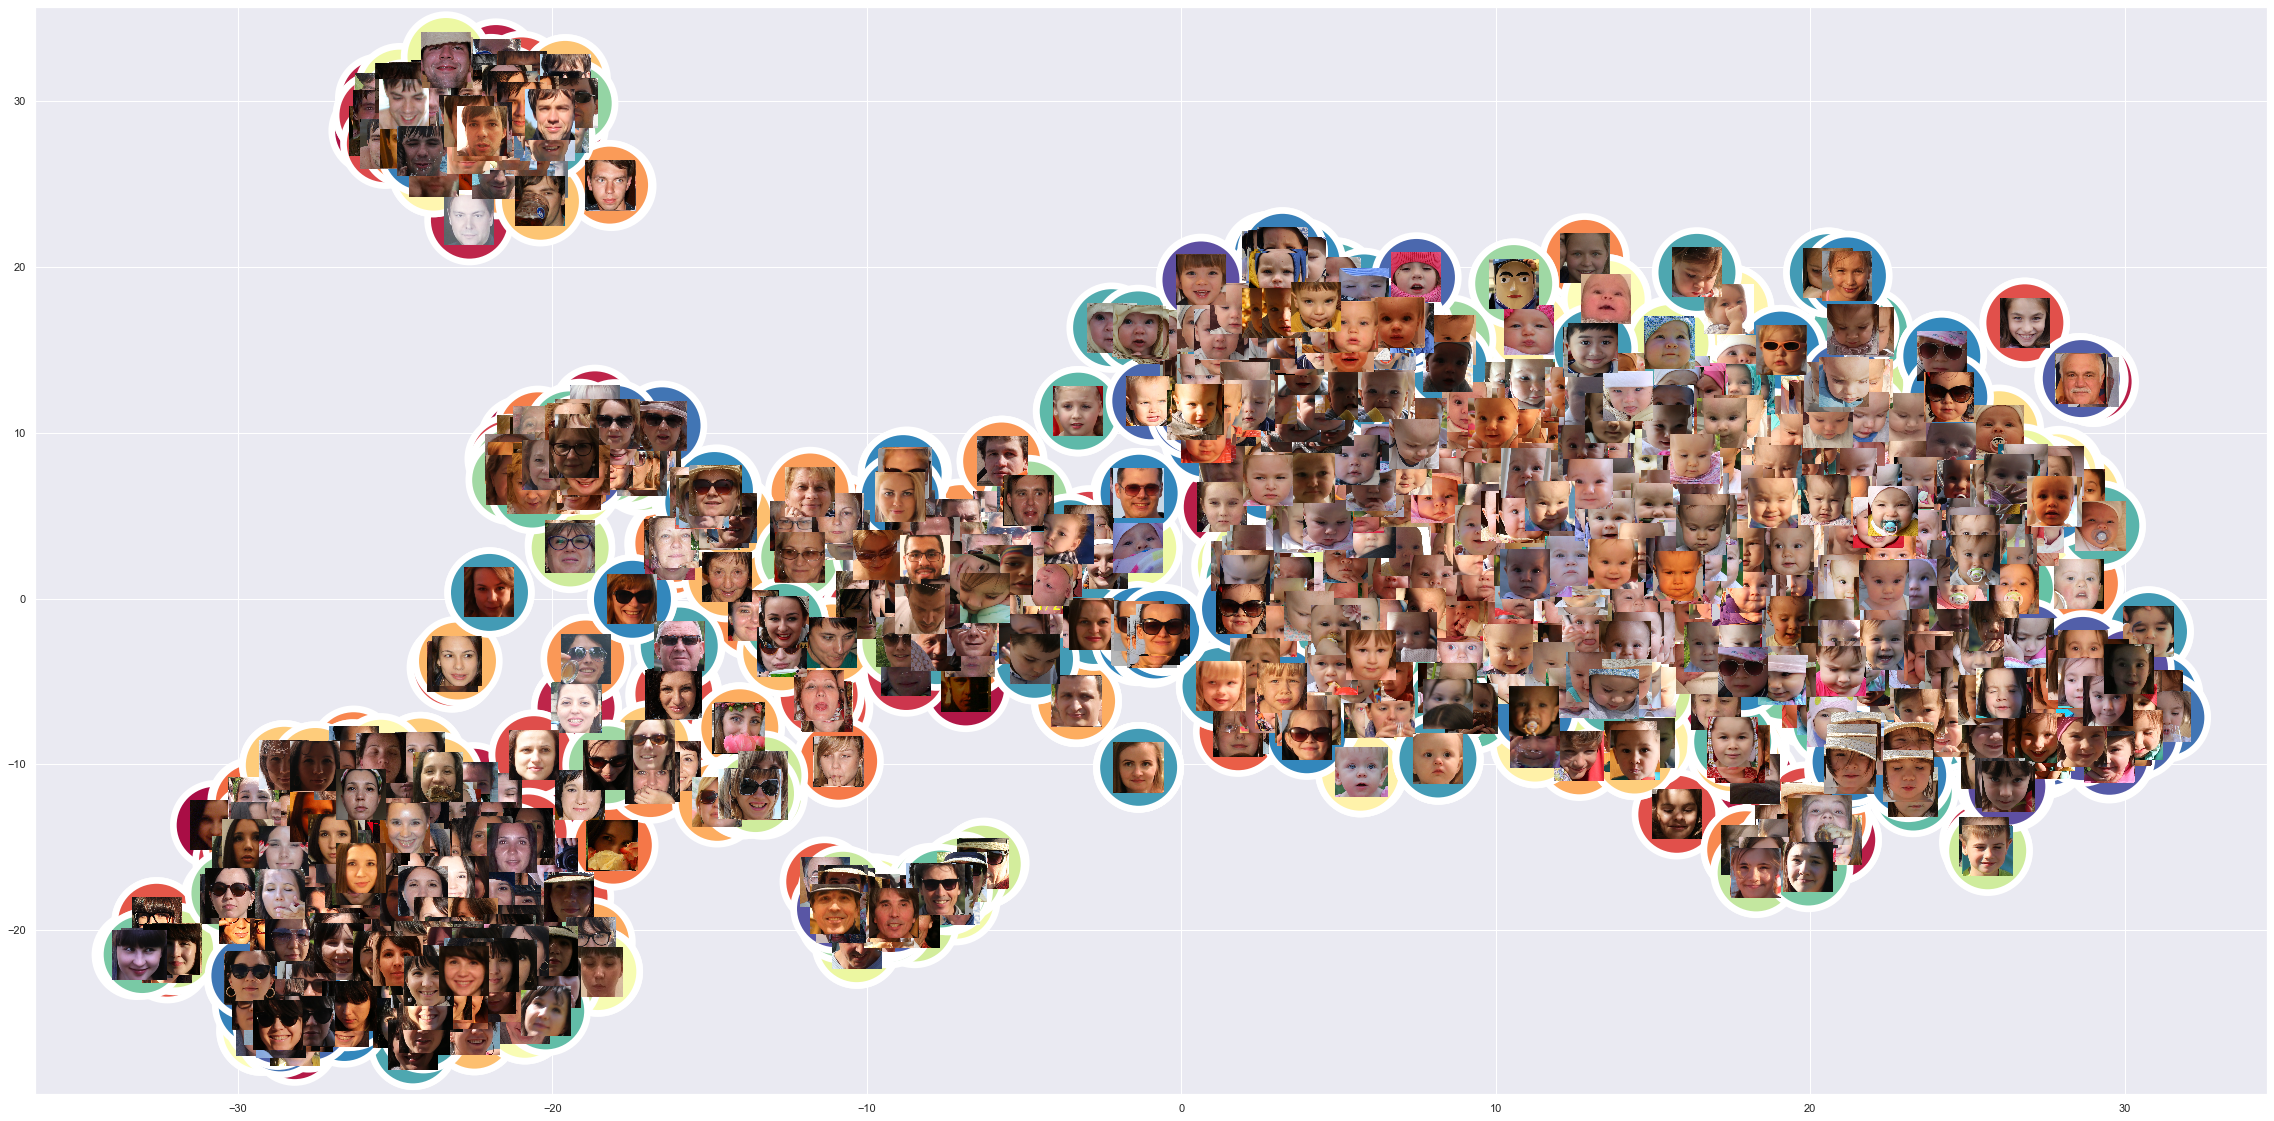

In [22]:
# https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
def getImage(path):
    image = plt.imread(path)
    image = resize_image(image, (50,50))
    return OffsetImage(image)

paths =  df_filtered.face_file_path
x = X_embedded[:,0]
y = X_embedded[:,1]

fig, ax = plt.subplots(figsize=(40, 20))
ax.scatter(x, y)


for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = creation_date, s=7000, palette=sns.color_palette('Spectral',n_colors))
plt.legend([],[], frameon=False)
plt.show()